<a href="https://colab.research.google.com/github/BaidenGenie/BaidenGenie/blob/main/TASK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression Metrics:
Precision: 0.5000
Recall: 0.0507
F1-score: 0.0920
ROC-AUC: 0.5152

SVM Metrics:
Precision: 0.5000
Recall: 0.0507
F1-score: 0.0920
ROC-AUC: 0.5152


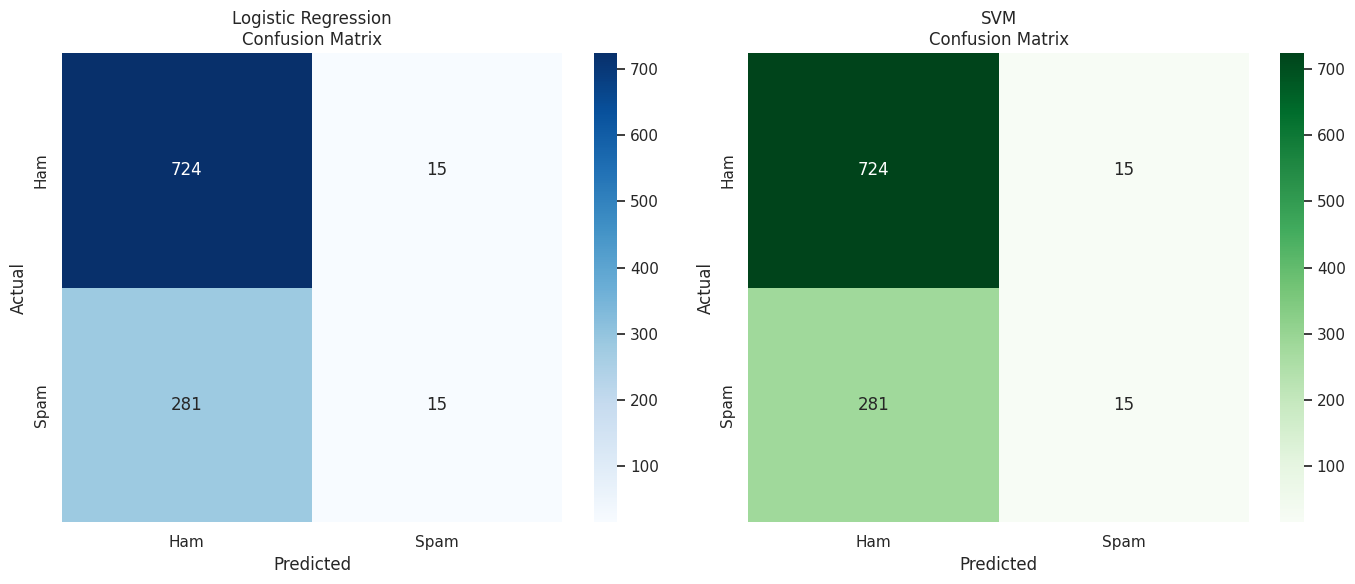

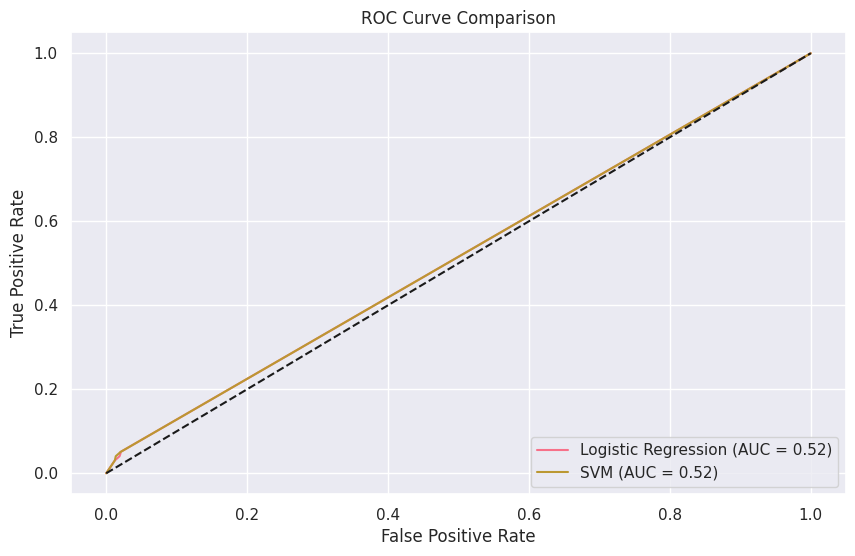

<Figure size 1000x600 with 0 Axes>

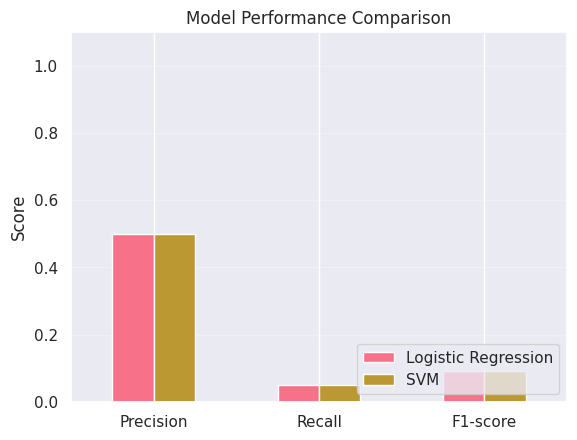

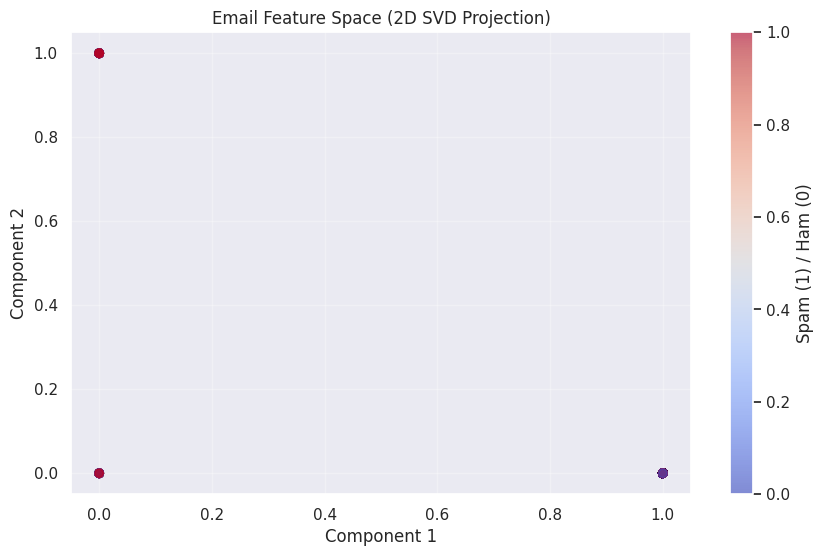


Top Predictive Words (Logistic Regression):


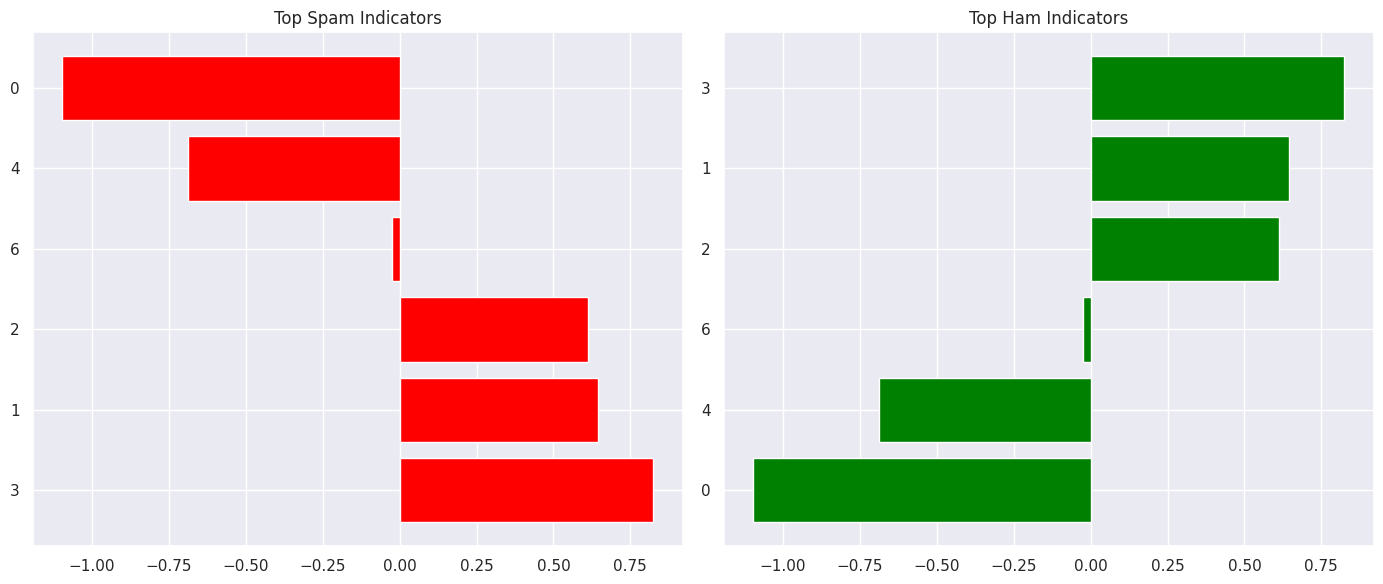

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (precision_score, recall_score,
                            f1_score, roc_auc_score,
                            confusion_matrix, roc_curve)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

#Set style for plots
#plt.style.use('seaborn') # This is causing the error
# Instead, use one of the Seaborn styles
sns.set_theme(style="darkgrid")  # Or other Seaborn styles like 'whitegrid', 'dark', 'white', 'ticks'
sns.set_palette("husl") # keep the palette code if you want to use the husl palette


# Load dataset
df = pd.read_csv("/content/emails.csv")

# Preprocessing
df['content'] = df['content'].astype(str)
X = df['content']
y = df['Prediction']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Pipeline
lr_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                             max_features=1000,
                             min_df=2,
                             token_pattern=r"(?u)\b\w+\b")),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000))
])

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
y_proba_lr = lr_pipe.predict_proba(X_test)[:, 1]

# SVM Pipeline
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english',
                             max_features=5000,
                             min_df=2,
                             token_pattern=r"(?u)\b\w+\b")),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm', SVC(class_weight='balanced', probability=True, kernel='linear'))
])

svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)
y_proba_svm = svm_pipe.predict_proba(X_test)[:, 1]

# Evaluation Metrics
def evaluate_model(y_true, y_pred, y_proba, model_name):
    metrics = {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }
    print(f"\n{model_name} Metrics:")
    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")
    return metrics

lr_metrics = evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
svm_metrics = evaluate_model(y_test, y_pred_svm, y_proba_svm, "SVM")

# Visualization 1: Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LR Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax2.set_title('SVM\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Visualization 2: ROC Curves
plt.figure(figsize=(10, 6))

# LR ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_metrics["ROC-AUC"]:.2f})')

# SVM ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_metrics["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Visualization 3: Metrics Comparison
metrics_df = pd.DataFrame({'Logistic Regression': lr_metrics, 'SVM': svm_metrics})
metrics_df = metrics_df.drop('ROC-AUC')  # We already showed this in ROC curve

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Visualization 4: Feature Space (2D projection)
tfidf = TfidfVectorizer(stop_words='english',
                             # Try reducing max_features to include more frequent words
                             max_features=500,
                             # min_df=2 is already a good setting
                             min_df=2,
                             # This ensures single-character words are included
                             token_pattern=r"(?u)\b\w+\b")
X_tfidf = tfidf.fit_transform(X)

# Dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_tfidf)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('Email Feature Space (2D SVD Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Spam (1) / Ham (0)')
plt.grid(True, alpha=0.3)
plt.show()

# Visualization 5: Top Predictive Words
def plot_top_words(vectorizer, model, n=20):
    feature_names = vectorizer.get_feature_names_out()
    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
    else:
        coef = model.best_estimator_.named_steps['svm'].coef_[0]

    top_spam = feature_names[np.argsort(coef)[-n:][::-1]]
    top_ham = feature_names[np.argsort(coef)[:n]]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Top spam words
    ax1.barh(top_spam, np.sort(coef)[-n:][::-1], color='red')
    ax1.set_title('Top Spam Indicators')

    # Top ham words
    ax2.barh(top_ham, np.sort(coef)[:n], color='green')
    ax2.set_title('Top Ham Indicators')

    plt.tight_layout()
    plt.show()

# Plot for Logistic Regression
print("\nTop Predictive Words (Logistic Regression):")
plot_top_words(lr_pipe.named_steps['tfidf'], lr_pipe.named_steps['lr'])